# PROGETTO VIDEO GAME SALES

## A cura di
## *Bria Simone mat. 224434*
## *Cosentino Cristian 224445*
***
# Introduzione
Il dataset che andremo ad analizzare contiene una lista di videogiochi con vendite superiori a 100.000 copie.  
L'obiettivo di questo progetto è di addestrare una collezione di algoritmi per predire le vendite di un videogioco in un determinato paese.

Le analisi del nostro progetto si dividono, principalmente, in tre fasi:

- Pre-processing  
- Classificazione  
- Post-processing

Le prime due sono le fasi principali, nelle quali creiamo la versione finale del dataset e tramite esso otteniamo vari modelli di classificazione.  
L'ultima fase, è utile per modificare degli aspetti del dataset in modo da ottenere dei risultati di classificazione migliori.  
Il post-processing viene effettuato solamente sui classificatori che hanno ottenuto i risultati migliori. Quindi, questa fase è come se fosse una sotto-sezione della fase di classificazione.
***
# Indice

# 1. Pre-processing
    1.1 Informazioni generali del dataset
    1.2 Analisi, statistiche e correlazione tra gli attributi
        1.2.1 Genere che ha avuto più successo
        1.2.2 Casa produttrice con il maggior numero di vendite
        1.2.3 Piattaforma con più giochi venduti
        1.2.4 Giochi che hanno avuto maggior successo nei singoli paesi e globalmente
    1.3 Dataset finale
    
# 2. Modelli di classificazione
      2.1 Vari modelli di classificazione
         2.1.1 Training e Performance dei modelli
         2.1.2 Ensemble
         2.1.3 Post-Processing

# 3. Clustering

# 4. Conclusioni
***

# Pre-processing
In questa prima sezione andremo ad analizzare il dataset e ad effettuare delle statistiche sugli attributi. Cercando di capire quali attributi sono importanti, quali bisogna modificare, affinchè si possano ottenere dei buoni modelli di classificazione, e quali di essi vadano eliminati.

## 1.1 Informazioni generali del dataset
Per iniziare, importiamo il dataset e cerchiamo di ottenere semplici informazioni riguardo la dimensione e statistiche sulle colonne.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-notebook')

df = pd.read_csv('videogame_sales_data.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In totale sono presenti 11 attributi, la cui descrizione di ognuno di essi è riportata qui sotto:

- **Rank** - Posizionamento nella classifica generale delle vendite
- **Name** - Nome del gioco
- **Platform** - Piattaforma su cui è stato rilasciato il gioco (ad esempio PC,PS4, etc.)
- **Year** - Anno di rilascio del gioco
- **Genre** - Genere del gioco
- **Publisher** - Casa produttrice del gioco
- **NA_Sales** - Vendite in Nord America (in milioni)
- **EU_Sales** - Vendite in Europa (in milioni)
- **JP_Sales** - Vendite in Giappone (in milioni)
- **Other_Sales** - Vendite nel resto del mondo (in milioni)
- **Global_Sales** - Totale vendite nel mondo

Ora controlliamo la dimensione del dataset, per capire con quante entry abbiamo a che fare.

In [2]:
df.shape

(16598, 11)

Verifico quante entries sono presenti per ciascun attributo, così da verificare la presenza di valori nulli.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Controlliamo ora le colonne con valori nulli utilizzando la funzione isnull function e grafichiamo i dati tramite una heatmap per vedere esattamente  dove si trovano maggiormente i valori mancanti per ulteriori valutazioni.

In [4]:
df.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


Mostriamo tutti i dati mancanti tramite una rappresentazione grafica con *heatmap*

<AxesSubplot:>

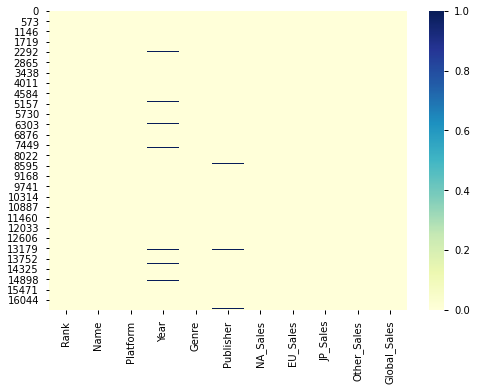

In [5]:
sns.heatmap(df.isnull(), cmap="YlGnBu")

Possiamo vedere che ci sono dei valori mancanti nelle colonne **Publisher** e **Year**. Cerchiamo quindi di riempirli con dei valori correlati

In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Andiamo a descrivere in maniera generale il dataset al fine di risalire ad informazioni utili in questa fase.

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Potremmo pensare di eliminare i valori mancanti ma questo comporterebbe una perdita nel dataset. Andiamo quindi a sfruttare le informazioni ausiliarie sopra ricavate (come ad esempio la media) per colmare questa lacuna.

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

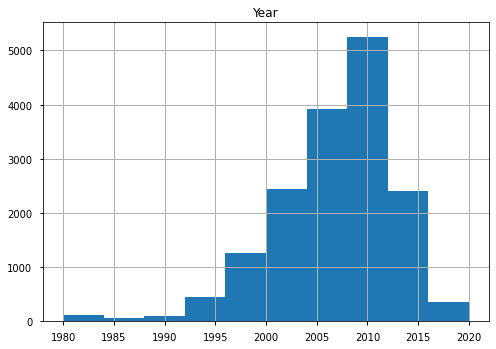

In [8]:
df.hist(column="Year")

Andiamo a effettuare la sostituzione dei valori *null* con il loro valore medio.  
Effettuiamo questa sostituzione in quanto abbiamo pochi valori null rispetto al totale (278 su 16.598), ovvero circa 1.5% del totale.  
Nel caso in cui avessimo avuto un quantitativo significativo di valori nan questa procedura avrebbe portato ad una sottostima della variazione dei dati. 

In [9]:
mean = df['Year'].mean()
df['Year'].fillna(mean, inplace=True)

Rappresentiamo nuovamente la *heatmap* per vedere se l'operazione è andata a buon fine

<AxesSubplot:>

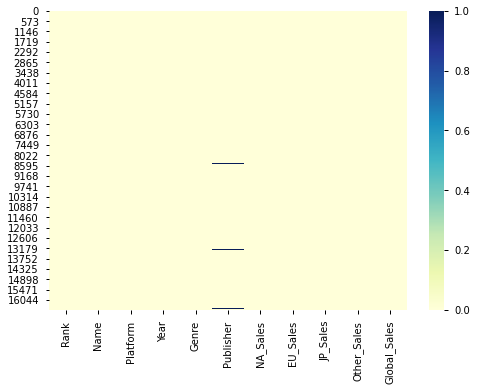

In [10]:
sns.heatmap(df.isnull(), cmap="YlGnBu")

Come possiamo notare dal grafico precedente abbiamo correttamente sostituito i valori mancanti nel dataset relativi alla colonna **Year**.  
Effettuiamo una procedura analoga per la colonna **Publisher**. L'attributo in questione, tuttavia, non è un valore numerico.  
Di conseguenza, lo sostituiremo con un valore da noi scelto al fine di evitare valori mancanti nel dataset.

In [11]:
df['Publisher'].fillna('Other', inplace=True)

<AxesSubplot:>

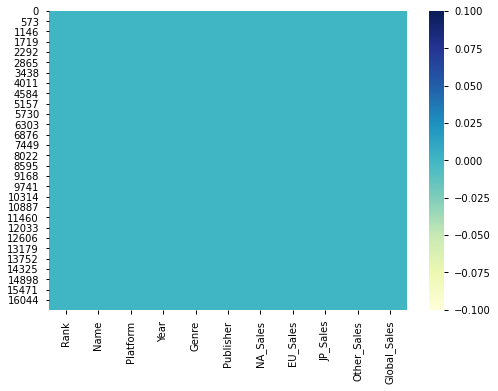

In [12]:
sns.heatmap(df.isnull(), cmap="YlGnBu")

Abbiamo gestito tutti i valori null presenti nel dataset e siamo pronti quindi per ulteriori step di pre-processing.

## 1.2 Analisi, statistiche e correlazione tra gli attributi

Prima di partire con la classificazione, effettuiamo delle analisi sui dati.

### 1.2.1 Genere che ha avuto più successo

Per prima cosa verifichiamo il genere di videogioco che ha avuto più successo.

In [13]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

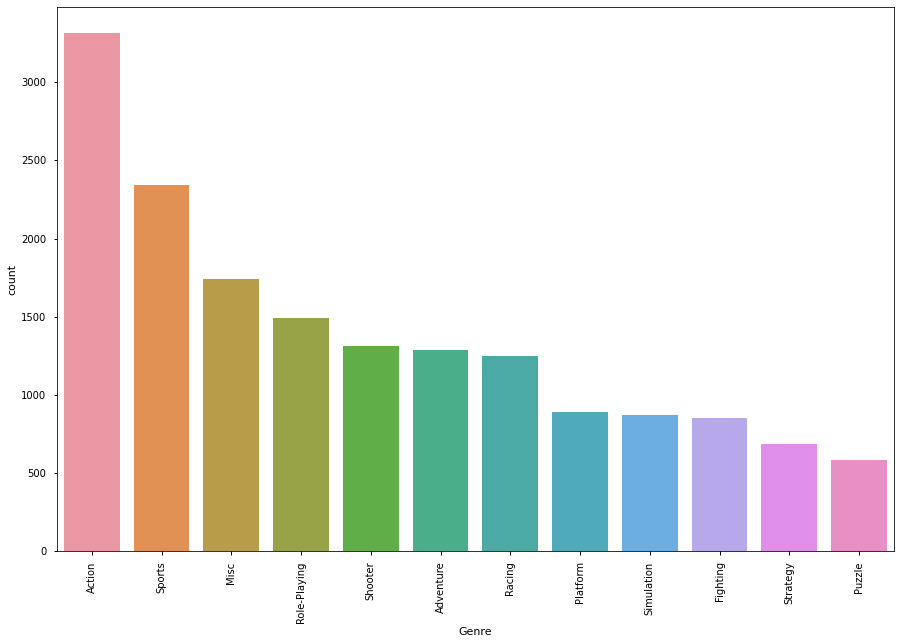

In [14]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)

Dall'analisi si evince che il genere che ha avuto maggior successo è il genere di **Azione**.  
Ipotizziamo che questo valore sia dovuto al fatto che in alcuni Paesi vi è una forte vendita di titoli di questo genere e che quindi non ci sia un equa distribuzione delle vendite su questo attributo.  
Per verificare ciò mostriamo come, le vendite nei singoli paesi, sono correlate ai generi dei videogiochi.

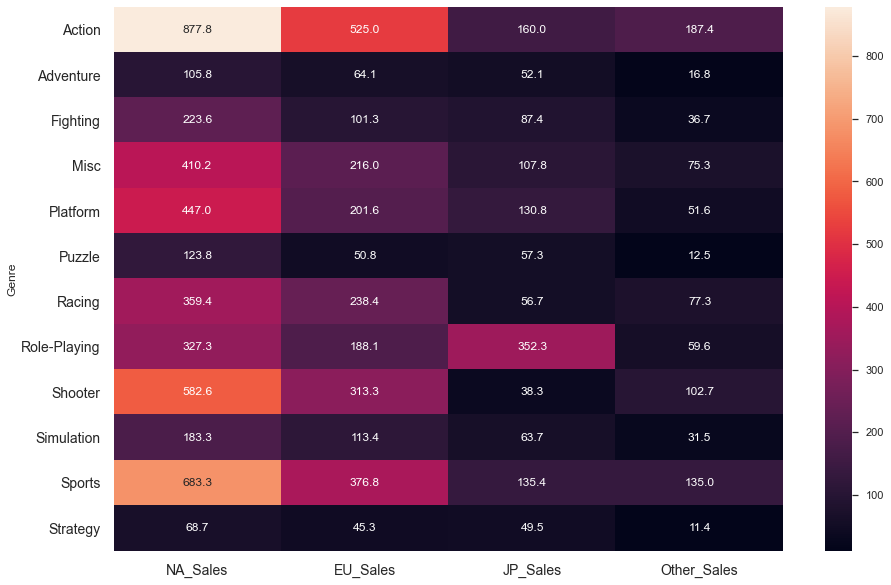

In [15]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Dalla matrice di correlazione si evince che i giochi d'azione sono maggiormente venduti in paesi quali Nord America e Europa. Oltre a questo, notiamo che il Nord America è il paese che incide maggiormente sulle vendite globali. Possiamo comprovare questa ipotesi grazie al seguente istogramma:

In [16]:
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


<AxesSubplot:xlabel='region', ylabel='sale'>

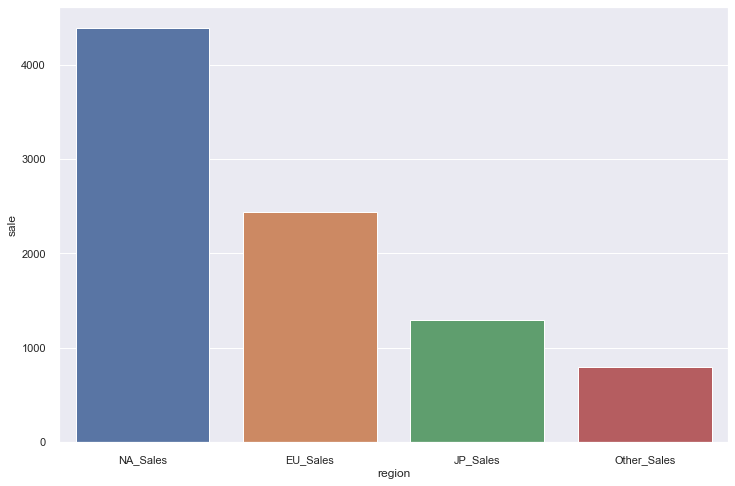

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

([<matplotlib.patches.Wedge at 0x1483a6a30>,
 [Text(-1.0997117266962277, 0.025181703016309925, 'NA_Sales'),
  Text(0.7981571088480199, -0.7569314563389279, 'EU_Sales'),
  Text(0.935642530069744, 0.5784229040457237, 'JP_Sales'),
  Text(0.30514884927416874, 1.0568274124882695, 'Other_Sales')],
 [Text(-0.5998427600161241, 0.013735474372532685, '49.3%'),
  Text(0.4353584230080108, -0.412871703457597, '27.3%'),
  Text(0.510350470947133, 0.3155034022067583, '14.5%'),
  Text(0.1664448268768193, 0.5764513159026924, '8.9%')])

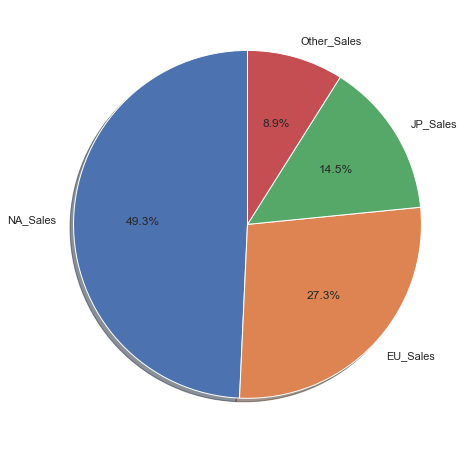

In [18]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

Il Nord America copre più del 50% delle vendite globali.  
Poiché effettueremo delle analisi sulle vendite suddivise per continenti, presentiamo dei grafici rappresentativi delle vendite suddivise per genere, anno o piattaforma.

### 1.2.2 Casa produttrice con il maggior numero di vendite

Effettuiamo una visualizzazione che mette in relazione la casa produttrice con le vendite globali al fine di illustrare chi ha venduto il maggior numero di copie.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

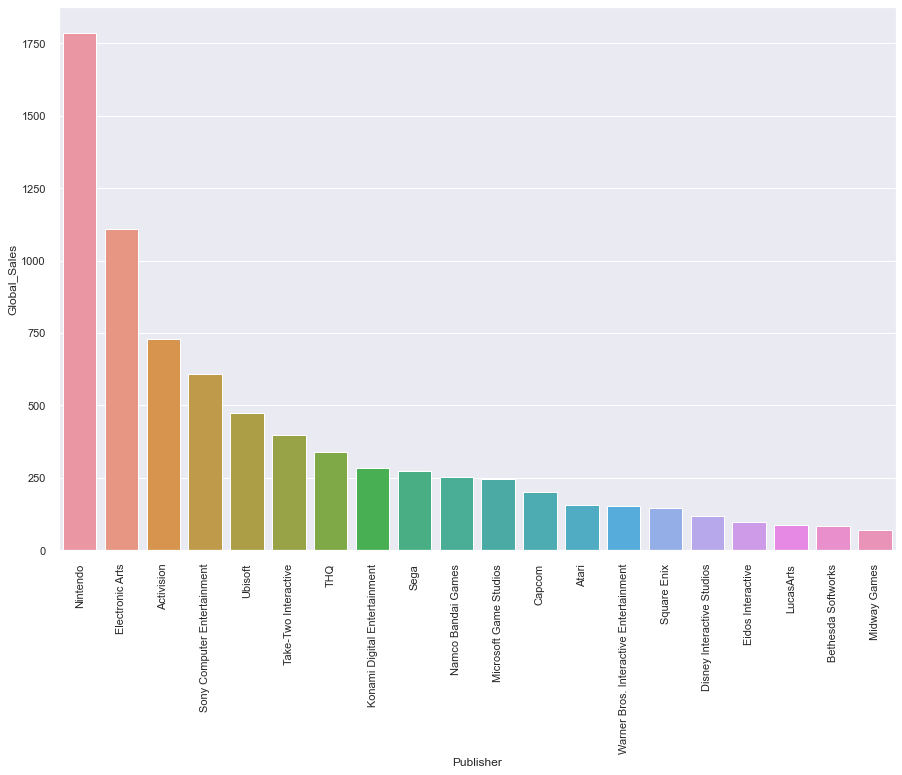

In [19]:
sale_pbl = df[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

### 1.2.3 Piattaforma con più giochi venduti

Possiamo effettuare un'altra tipologia di plotting al fine di visualizzare la console che ha venduto più giochi in questo intervallo temporale da noi analizzato. In particolare avremo che:

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

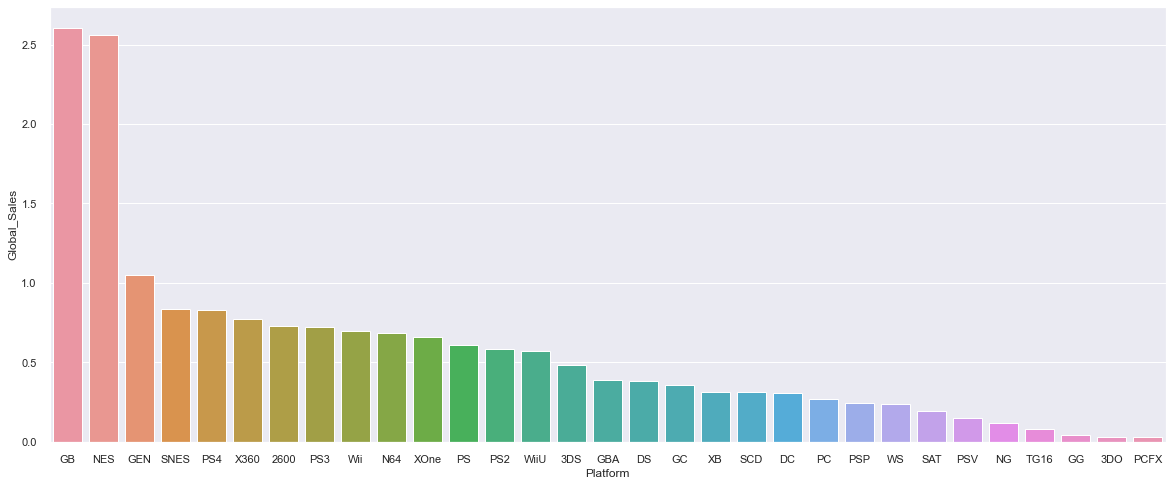

In [20]:
GP=df[["Platform", "Global_Sales"]].groupby(['Platform'], as_index=False).mean().sort_values(by='Global_Sales', ascending=False)
plt.figure(figsize=(20,8))

sns.barplot(x='Platform', y='Global_Sales', data=GP)

Dal grafico precedente si evince che la piattaforma che ha venduto il maggior numero di giochi è senza ombra di dubbio il **Game Boy** (GB).

### 1.2.4 Giochi che hanno avuto maggior successo nei singoli paesi e globalmente

Effettuiamo l'analisi sopracitata al fine di mostrare i giochi che hanno avuto più successo.  
Partiamo dall'analizzare quali sono stati i giochi più venduti a livello globale.

In [21]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Mostriamo nuovamente i 5 giochi più venduti a livello globale e, da questi, ci accorgiamo che **Wii Sports** presenta un valore di Global_Sales molto maggiore rispetto a tutti gli altri (più del doppio degli altri). Decidiamo quindi di escluderlo dalle analisi che andiamo ad effettuare qui di seguito.  
Mostriamo il grafico a livello mondiale.

([<matplotlib.patches.Wedge at 0x14862d0a0>,
 [Text(-0.7422262738006628, 0.8118498373960442, 'Super Mario Bros.'),
  Text(-0.9262484177949014, -0.5933497017210356, 'Mario Kart Wii'),
  Text(0.2887245433351614, -1.0614321165651164, 'Wii Sports Resort'),
  Text(1.0920285560207827, -0.13218786947055391, 'Pokemon Red/Pokemon Blue'),
  Text(0.5814524380237861, 0.9337628512187639, 'Tetris')],
 [Text(-0.40485069480036145, 0.4428271840342059, '23.6%'),
  Text(-0.5052264097063098, -0.3236452918478376, '21.0%'),
  Text(0.15748611454645167, -0.5789629726718816, '19.3%'),
  Text(0.5956519396476997, -0.07210247425666576, '18.4%'),
  Text(0.31715587528570144, 0.5093251915738711, '17.7%')])

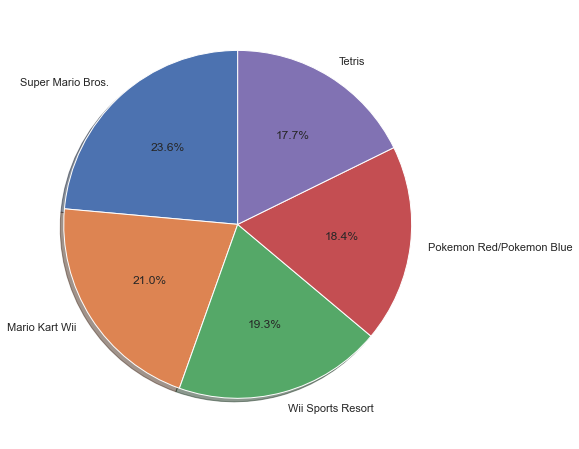

In [22]:
game = df.loc[df['Name']!='Wii Sports',['Name','Global_Sales']]
game = game.head()
labels = game['Name']
sizes = game['Global_Sales']
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

Da questa analisi si evince che il gioco più venduto è **Super Mario Bros**.  
Effettuiamo quindi l'analisi specializzandola all'interno di un singolo continente al fine di verificare le vendite effettive dei singoli giochi e comprovare questo risultato.

### Europe

([<matplotlib.patches.Wedge at 0x14868a970>,
 [Text(-0.3158327702359226, 1.053683852607177, 'Super Mario Bros.'),
  Text(-1.0980610974662321, -0.06528266409433663, 'Mario Kart Wii'),
  Text(0.4605054714885119, -0.9989668216358056, 'Wii Sports Resort'),
  Text(0.9757232845930424, 0.5079016360506875, 'Pokemon Red/Pokemon Blue'),
  Text(0.2010892667078639, 1.0814634098363634, 'Tetris')],
 [Text(-0.17227242012868502, 0.5747366468766419, '9.3%'),
  Text(-0.5989424167997629, -0.035608725869638154, '33.4%'),
  Text(0.2511848026300974, -0.5448909936195303, '28.5%'),
  Text(0.5322127006871139, 0.27703725602764767, '23.0%'),
  Text(0.10968505456792575, 0.5898891326380162, '5.9%')])

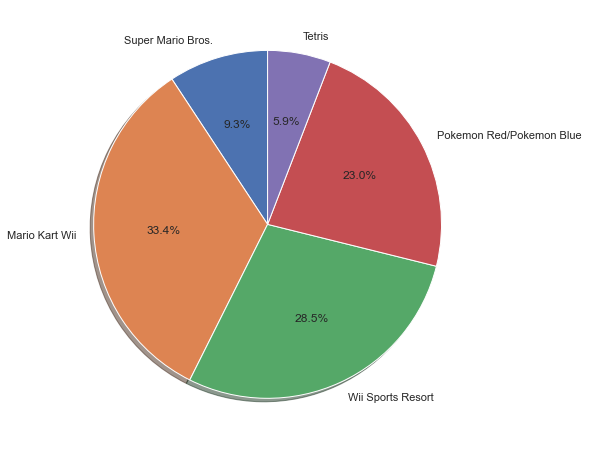

In [23]:
game = df.loc[df['Name']!='Wii Sports',['Name','EU_Sales']]
game = game.head()
labels = game['Name']
sizes = game['EU_Sales']
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

### Japan

([<matplotlib.patches.Wedge at 0x1486f2310>,
 [Text(-0.7541751849622347, 0.8007620060836923, 'Super Mario Bros.'),
  Text(-1.0292814379157622, -0.3880460302104137, 'Mario Kart Wii'),
  Text(-0.454533381693571, -1.0016982604188782, 'Wii Sports Resort'),
  Text(0.9657657389330475, -0.526589534175438, 'Pokemon Red/Pokemon Blue'),
  Text(0.496342700994426, 0.9816536676290463, 'Tetris')],
 [Text(-0.4113682827066734, 0.4367792760456503, '24.0%'),
  Text(-0.5614262388631429, -0.21166147102386199, '13.4%'),
  Text(-0.24792729910558414, -0.546380869319388, '11.6%'),
  Text(0.5267813121452986, -0.2872306550047843, '36.1%'),
  Text(0.270732382360596, 0.5354474550703888, '14.9%')])

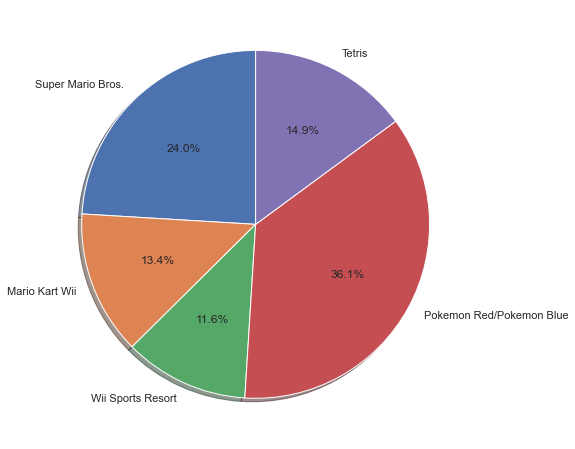

In [24]:
game = df.loc[df['Name']!='Wii Sports',['Name','JP_Sales']]
game = game.head()
labels = game['Name']
sizes = game['JP_Sales']
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

### North America

([<matplotlib.patches.Wedge at 0x14874dd60>,
 [Text(-0.9012003710813618, 0.6307439188472734, 'Super Mario Bros.'),
  Text(-0.7069425425146267, -0.8427527760754963, 'Mario Kart Wii'),
  Text(0.3723898474444098, -1.0350486952411126, 'Wii Sports Resort'),
  Text(1.039461412468675, -0.3598888328201187, 'Pokemon Red/Pokemon Blue'),
  Text(0.7625839202207596, 0.7927583267432379, 'Tetris')],
 [Text(-0.49156383877165183, 0.34404213755305824, '30.6%'),
  Text(-0.38560502318979634, -0.45968333240481607, '16.7%'),
  Text(0.20312173496967803, -0.5645720155860613, '16.6%'),
  Text(0.5669789522556408, -0.1963029997200647, '11.8%'),
  Text(0.41595486557495975, 0.43241363276903877, '24.4%')])

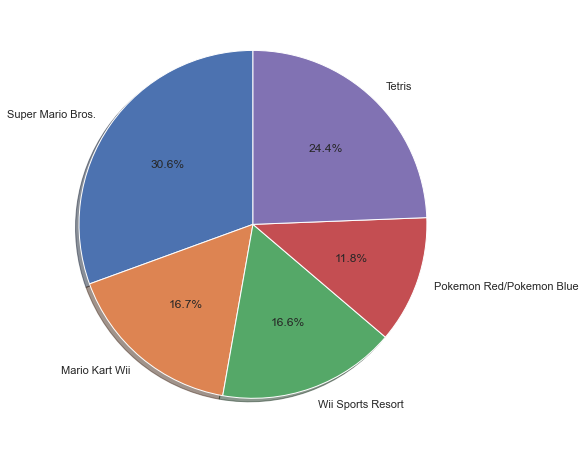

In [25]:
game = df.loc[df['Name']!='Wii Sports',['Name','NA_Sales']]
game = game.head()
labels = game['Name']
sizes = game['NA_Sales']
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

### Other Sales

([<matplotlib.patches.Wedge at 0x1487bb310>,
 [Text(-0.30465662747539407, 1.0569694126772633, 'Super Mario Bros.'),
  Text(-1.0787659477729226, -0.21509074811713413, 'Mario Kart Wii'),
  Text(0.8692196032895299, -0.6741344682310737, 'Wii Sports Resort'),
  Text(0.7792335872033986, 0.7763987484367318, 'Pokemon Red/Pokemon Blue'),
  Text(0.23079387788554465, 1.075515776699976, 'Tetris')],
 [Text(-0.16617634225930586, 0.5765287705512345, '8.9%'),
  Text(-0.5884177896943213, -0.11732222624570951, '38.4%'),
  Text(0.47411978361247076, -0.367709709944222, '34.3%'),
  Text(0.4250365021109447, 0.4234902264200355, '11.6%'),
  Text(0.1258875697557516, 0.5866449691090777, '6.7%')])

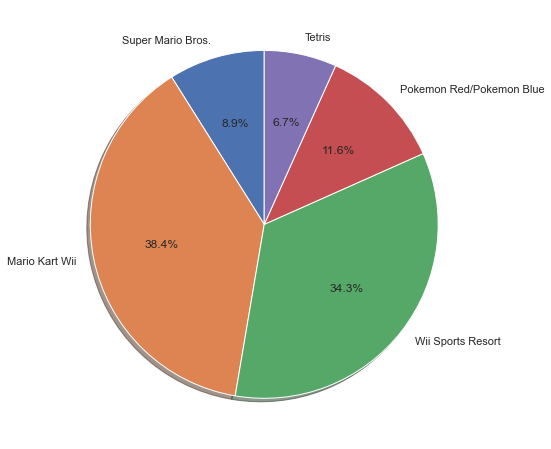

In [26]:
game = df.loc[df['Name']!='Wii Sports',['Name','Other_Sales']]
game = game.head()
labels = game['Name']
sizes = game['Other_Sales']
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

Notiamo che Super Mario Bros, il gioco che avevamo indicato come più venduto a livello mondiale, risulta essere comunque tra i primi cinque giochi in ogni continente.

Prima di inziare con la fase di discretizzazione andiamo a verificare il periodo di osservazione ricoperto da questo dataset

In [27]:
df_sort=df.sort_values(by=['Year'],ascending=True)
print("Inizio osservazione: " + str(int(df_sort['Year'].iloc[0])))
print("Fine osservazione: " + str(int(df_sort['Year'].iloc[len(df)-1])))

Inizio osservazione: 1980
Fine osservazione: 2020


## 1.3 Dataset Finale
Dopo aver effettuato tutte le modifiche agli attributi e dopo esserci accertati dell'effettiva importanza degli attributi rimanenti, abbiamo ottenuto la versione finale, che verrà utilizzata durante la classificazione, del nostro dataset.

In [28]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Una volta ottenuti i nostri attributi di riferimento, possiamo considerare concluso il preprocessing. 

# Clustering

Si è provato a fare una analisi per località, l'obbiettivo è quello di trovare giochi che avessero un numero di vendite simile, ovvero giochi che si comporproposti.tano allo stesso modo (pattern comuni) in funzione dei paesi in cui sono 

In particolare il clustering viene fatto sui dati ottenuti nella fase del preprocessing.

In [29]:
def plot_clusters(X, label1, label2, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel(label1, fontsize=14)
    plt.ylabel(label2, fontsize=14, rotation=90)

### NA_SALES Cluster

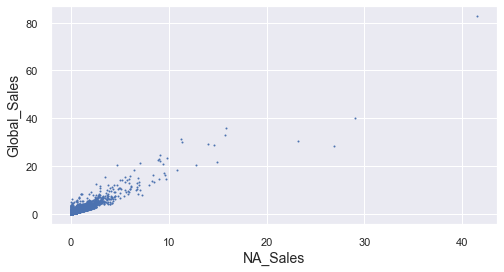

In [30]:
NA_SALES_CLUSTER = df.loc[:,['NA_Sales','Global_Sales']]
NA_SALES = df.loc[:,['NA_Sales','Global_Sales']].values

plt.figure(figsize=(8,4))
plot_clusters(NA_SALES, "NA_Sales", "Global_Sales")    
plt.show()

Non abbiamo una distribuzione di punti ben definita.  
Inoltre sono presenti numerosi outliers, punti che si comportano in maniera totalmente differente dagli altri. Il nostro intento è quello di suddividere il dataset in 3 gruppi: **low sales**, **medium sales**, **high sales**.  
Definiamo quindi tre profili di vendita e li assegniamo ai singoli giochi al fine di vedere il rendimento di quest'ultimi e verificare se ci sono giochi con lo stesso profilo.

- Cluster 0 = low sales
- Cluster 1 = medium sales
- Cluster 2 = high sales 

Procediamo adesso con l'algoritmo *K-Means*

In [31]:
from sklearn.cluster import KMeans


k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(NA_SALES)

Ogni istanza è assegnata ad uno dei tre clusters:

In [32]:
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

Possiamo accedere direttamente ai centroidi

In [33]:
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_.shape)

[[ 0.16844581  0.34135906]
 [13.73       27.0624    ]
 [ 2.32263699  4.77035959]]
(3, 2)


Definiamo **label** di un'istanza l'indice del cluster al quale tale istanza è stata assegnata.

In [34]:
NA_SALES_CLUSTER['Cluster'] = kmeans.labels_

#Aggiungiamo una colonna al nostro df per ogni paese in modo da risalire ai suoi cluster
df['Cluster-NA'] = kmeans.labels_

Definiamo le funzioni che ci permetterano di graficare correttamente la distribuzione dei punti all'interno dei clusters considerati i loro centroidi otteneniamo un **Diagramma di Voronoi**.

In [35]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=10)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='blue'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=18,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=9, linewidths=18,
               color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, label1, label2, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel(label1, fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel(label2, fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)

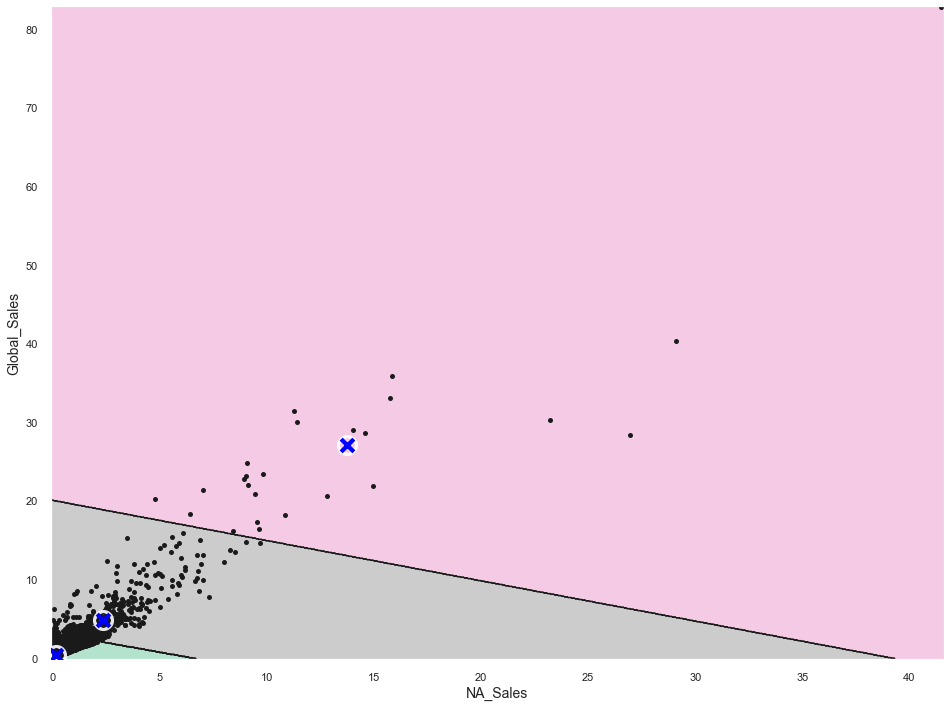

In [36]:
plt.figure(figsize=(16, 12))
plot_decision_boundaries(kmeans, NA_SALES, 'NA_Sales', 'Global_Sales')
plt.show()

In [37]:
def category(cluster):
    if cluster == 0:
        return 'low'
    if cluster == 1:
        return 'medium'
    if cluster == 2:
        return 'high'

NA_SALES_CLUSTER['Cluster']  = NA_SALES_CLUSTER['Cluster'].apply(category)

NA_SALES_CLUSTER.head()

,NA_Sales,Global_Sales,Cluster
0,41.49,82.74,medium
1,29.08,40.24,medium
2,15.85,35.82,medium
3,15.75,33.00,medium
4,11.27,31.37,medium


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


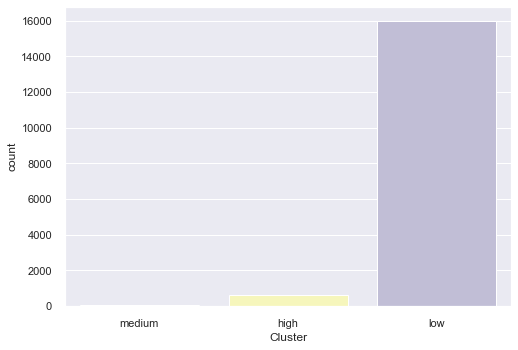

In [38]:
sns.countplot(NA_SALES_CLUSTER['Cluster'], palette='Set3')
plt.show()

### EU_Sales Cluster

Dopo aver analizzato il NA vediamo all'opera il K-means su EU_Sales effettueremo questa stessa operazione per ogni paese cosi da visionare se la maggior parte dei giochi ha uno stesso profilo di vendita

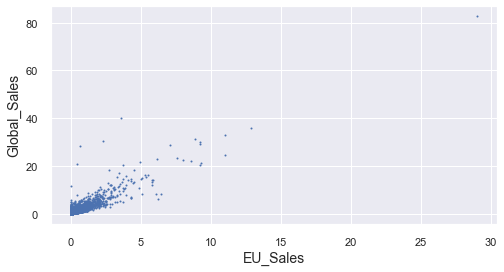

In [39]:
EU_SALES_CLUSTER = df.loc[:,['EU_Sales','Global_Sales']]
EU_SALES = df.loc[:,['EU_Sales','Global_Sales']].values

plt.figure(figsize=(8,4))
plot_clusters(EU_SALES, "EU_Sales", "Global_Sales")    
plt.show()

In [40]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(EU_SALES)

EU_SALES_CLUSTER['Cluster'] = kmeans.labels_
df['Cluster-EU'] = kmeans.labels_

EU_SALES_CLUSTER.head()

,EU_Sales,Global_Sales,Cluster
0,29.02,82.74,1
1,3.58,40.24,1
2,12.88,35.82,1
3,11.01,33.00,1
4,8.89,31.37,1


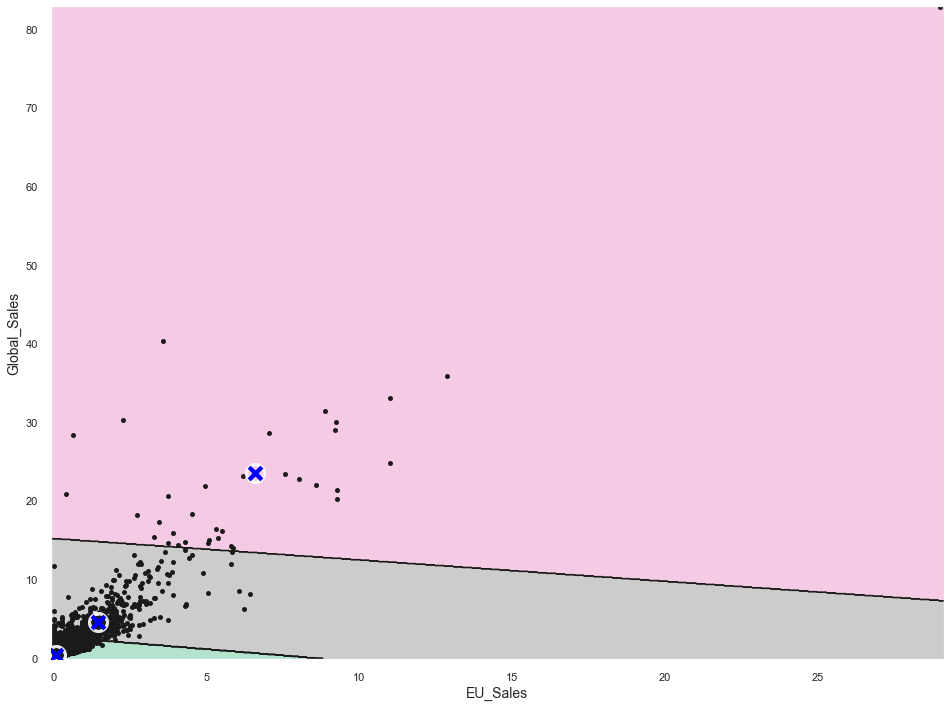

In [41]:
plt.figure(figsize=(16, 12))
plot_decision_boundaries(kmeans, EU_SALES, 'EU_Sales', 'Global_Sales')
plt.show()

Dal grafico possiamo notare che la clusterizzazione segue quella precedente non abbiamo notato visivamente cambiamenti. Valuteremo poi alla fine dei diversi processi di clustering se alcuni giochi sono stati valutati in modo differente rispetto ad altri.

In [42]:
EU_SALES_CLUSTER['Cluster']  = EU_SALES_CLUSTER['Cluster'].apply(category)
EU_SALES_CLUSTER.head()

,EU_Sales,Global_Sales,Cluster
0,29.02,82.74,medium
1,3.58,40.24,medium
2,12.88,35.82,medium
3,11.01,33.00,medium
4,8.89,31.37,medium


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


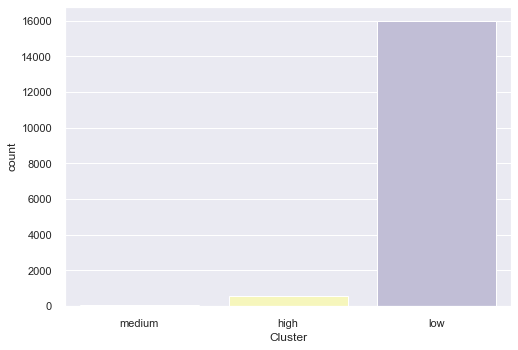

In [43]:
sns.countplot(EU_SALES_CLUSTER['Cluster'], palette='Set3')
plt.show()

### JP_Sales Cluster

Passiamo al cluster relativo al Giappone (JP)

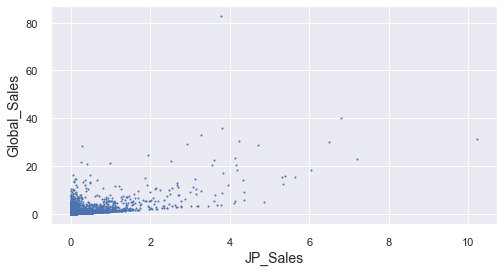

In [44]:
JP_SALES_CLUSTER = df.loc[:,['JP_Sales','Global_Sales']]
JP_SALES = df.loc[:,['JP_Sales','Global_Sales']].values

plt.figure(figsize=(8,4))
plot_clusters(JP_SALES, "JP_Sales", "Global_Sales")    
plt.show()

In [45]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(JP_SALES)

JP_SALES_CLUSTER['Cluster'] = kmeans.labels_
df['Cluster-JP'] = kmeans.labels_

JP_SALES_CLUSTER.head()

,JP_Sales,Global_Sales,Cluster
0,3.77,82.74,1
1,6.81,40.24,1
2,3.79,35.82,1
3,3.28,33.00,1
4,10.22,31.37,1


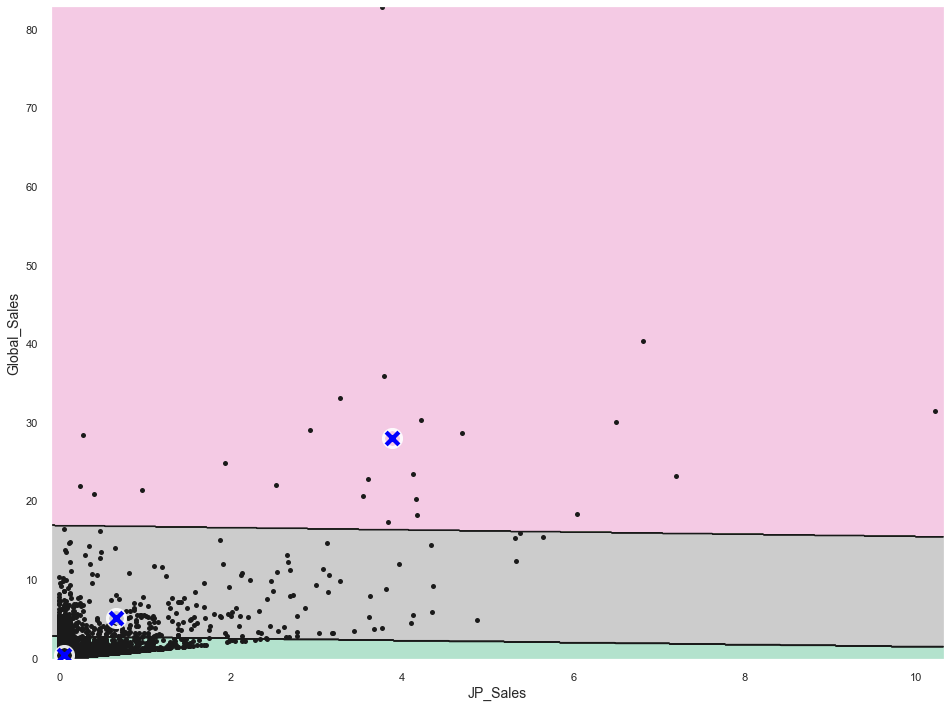

In [46]:
plt.figure(figsize=(16, 12))
plot_decision_boundaries(kmeans, JP_SALES, 'JP_Sales', 'Global_Sales')
plt.show()

Dopo un'ulteriore analisi possiamo notare che, anche in questo caso, abbiamo un punto che si discosta di molto rispetto a tutti gli altri.
Potremmo pensare che questo porta delle problematiche nella clusterizzazione quindi proveremo in un secondo momento a togliere questo valore e valutare una clusterizzazione senza quest'ultimo.

In [47]:
JP_SALES_CLUSTER['Cluster']  = JP_SALES_CLUSTER['Cluster'].apply(category)
JP_SALES_CLUSTER.head()

,JP_Sales,Global_Sales,Cluster
0,3.77,82.74,medium
1,6.81,40.24,medium
2,3.79,35.82,medium
3,3.28,33.00,medium
4,10.22,31.37,medium


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


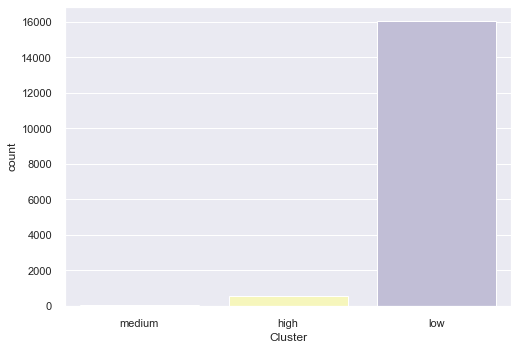

In [48]:
sns.countplot(JP_SALES_CLUSTER['Cluster'], palette='Set3')
plt.show()

### Other_Sales Cluster

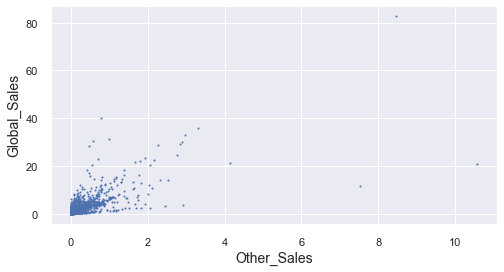

In [49]:
OTHER_SALES_CLUSTER = df.loc[:,['Other_Sales','Global_Sales']]
OTHER_SALES = df.loc[:,['Other_Sales','Global_Sales']].values

plt.figure(figsize=(8,4))
plot_clusters(OTHER_SALES, "Other_Sales", "Global_Sales")    
plt.show()

In [50]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(OTHER_SALES)

OTHER_SALES_CLUSTER['Cluster'] = kmeans.labels_
df['Cluster-OT'] = kmeans.labels_

OTHER_SALES_CLUSTER.head()

,Other_Sales,Global_Sales,Cluster
0,8.46,82.74,2
1,0.77,40.24,2
2,3.31,35.82,2
3,2.96,33.00,2
4,1.00,31.37,2


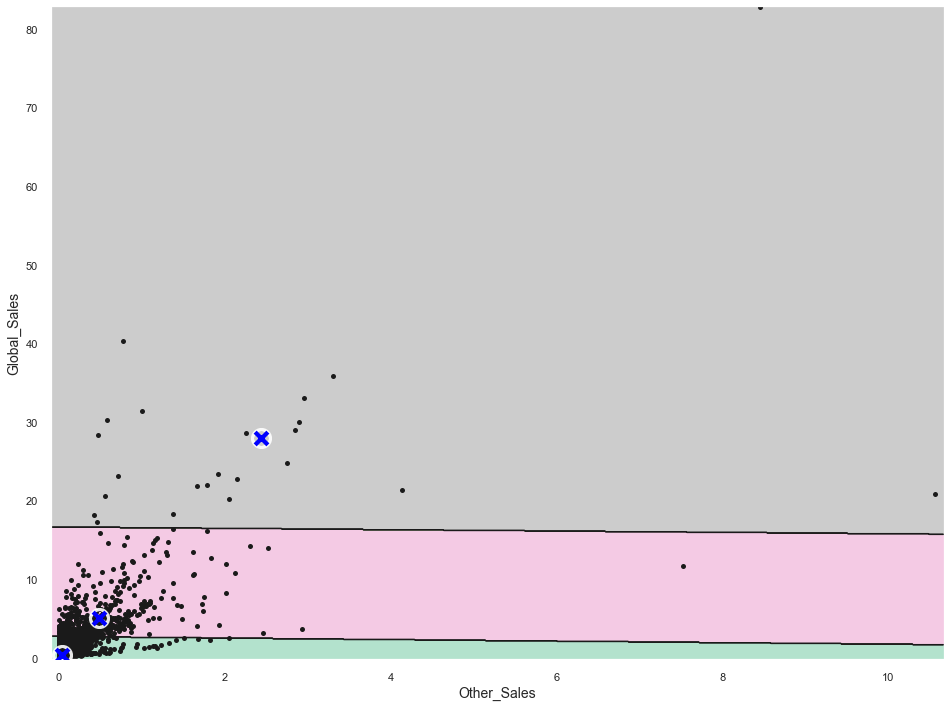

In [51]:
plt.figure(figsize=(16, 12))
plot_decision_boundaries(kmeans, OTHER_SALES, 'Other_Sales', 'Global_Sales')
plt.show()

Rispetto ai cluster precedenti notiamo una differenza: in questo caso i gruppi sono assegnati in maniera completamente differente rispetto ai cluster precedenti. Questo porterà a diminuire di molto la valutazione dei profili poichè due tipologie di gruppi sono scambiati tra loro e usati in modo opposto. Di conseguenza i giochi che nei passi precedenti venivano considerati come *medium* adesso vengono considerati all'interno di Other_Sales come *high*

In [52]:
OTHER_SALES_CLUSTER['Cluster']  = OTHER_SALES_CLUSTER['Cluster'].apply(category)
OTHER_SALES_CLUSTER.head()

,Other_Sales,Global_Sales,Cluster
0,8.46,82.74,high
1,0.77,40.24,high
2,3.31,35.82,high
3,2.96,33.00,high
4,1.00,31.37,high


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


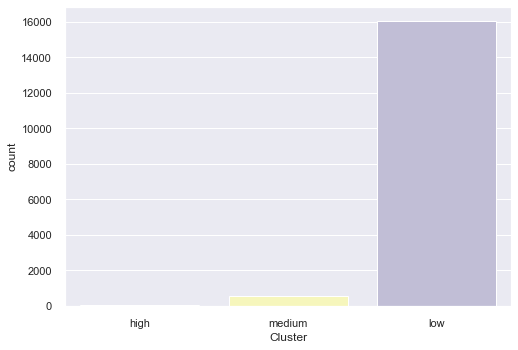

In [53]:
sns.countplot(OTHER_SALES_CLUSTER['Cluster'], palette='Set3')
plt.show()

Valutiamo adesso mettendo a confronto i vari giochi mettendoli a confronto al fine di valutare se lo stesso gioco in ogni cluster ha assunto un profilo equivalente nei vari paesi. Da ciò valuteremo quanti giochi hanno assunto profili differenti e quanti invece sono stati inseriti all'interno di uno stesso profilo

In [54]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster-NA,Cluster-EU,Cluster-JP,Cluster-OT
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,1,1,2
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1,1,1,2
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1,1,1,2
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1,1,1,2
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1,1,1,2
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1,1,1,2
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,1,1,1,2
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,1,1,1,2
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,1,1,1,2
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1,1,1,2


In [55]:
low = df[(df['Cluster-EU'] == 0) & (df['Cluster-JP'] == 0) & (df['Cluster-NA'] == 0)]
low.shape

(15943, 15)

In [56]:
medium = df[(df['Cluster-EU'] == 1) & (df['Cluster-JP'] == 1) & (df['Cluster-NA'] == 1) ]
medium.shape

(23, 15)

In [57]:
high = df[(df['Cluster-EU'] == 2) & (df['Cluster-JP'] == 2) & (df['Cluster-NA'] == 2)]
high.shape

(507, 15)

In [59]:
df.shape

(16598, 15)

## Ragionamenti prima del ricevimento

- Fare sottrazione tra tutti meno low medium e high e dire che, senza OT abbiamo ottenuto questo risultato.  
- Più del 90% dei giochi si comportano allo stesso modo.  
- (Fare la percentuale esatta)  
- Scriviamo un gioco che non rispecchia la stessa configurazione e spieghiamo perché.  
- Other clusterizza i giochi in maniera differente rispetto agli altri (perché ?? )
- Fare ragionamenti e analisi senza considerare Wii Sports

## Ragionamenti dopo il ricevimento

- Fare il cluster con i paesi NA, EU, EU, OT e fare molte combinazioni per trovare il k migliore. Conviene eliminare il Global Sales che è un totale e quindi inutile.
- Vedere la soluzione migliore di k
- Caratterizzare meglio i cluster ottenuti capendo a cosa si riferiscono dato il miglior k possibile
- Vedo i giochi che ricadono nel cluster e trovo un pattern comune
- Provare senza outliers => spiegare perché e poi andare avanti
- Utilizzare DBSCAN & K-MEANS e confrontare